<a href="https://colab.research.google.com/github/vijaynadimpalli/dlaicourse/blob/master/Exercises/Exercise%204%20-%20Handling%20Complex%20Images/Exercise%204-Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [10]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 55.9MB/s 
     |████████████████████████████████| 3.8MB 53.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=08d556754992b6417c8c02c90a31f6039dbb1232426c2486d2347e4701b3d75f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [11]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=[]):
    if(logs['accuracy'] > 0.999):
      print("We Done Boyy")
      self.model.stop_training = True

callbacks = myCallback()

--2020-10-02 18:56:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-10-02 18:56:08 (107 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [12]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100,activation='relu'),
        tf.keras.layers.Dense(10,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",target_size=(150,150),class_mode='binary',batch_size=10
        )

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [14]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
      train_generator,epochs=500,callbacks=[callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/500
8/8 [==============================] - 0s 17ms/step - loss: 0.7315 - accuracy: 0.5500
Epoch 2/500
8/8 [==============================] - 0s 18ms/step - loss: 0.6285 - accuracy: 0.7750
Epoch 3/500
8/8 [==============================] - 0s 16ms/step - loss: 0.3807 - accuracy: 0.8500
Epoch 4/500
8/8 [==============================] - 0s 16ms/step - loss: 0.2209 - accuracy: 0.8750
Epoch 5/500
8/8 [==============================] - 0s 15ms/step - loss: 0.1437 - accuracy: 0.9500
Epoch 6/500
8/8 [==============================] - 0s 16ms/step - loss: 0.0952 - accuracy: 0.9875
Epoch 7/500
8/8 [==============================] - 0s 16ms/step - loss: 0.1174 - accuracy: 0.9250
Epoch 8/500
8/8 [==============================] - 0s 16ms/step - loss: 0.1252 - accuracy: 0.9375
Epoch 9/500
8/8 [==============================] - 0s 16ms/step - loss: 0.0456 - accuracy: 1.0000


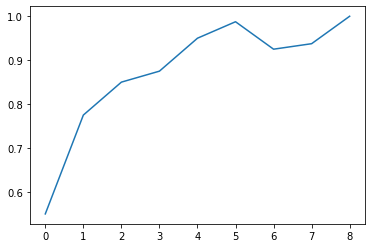

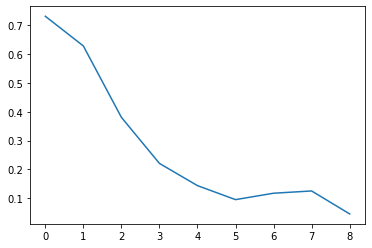

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(model.history.history['accuracy'])
plt.figure()
plt.plot(model.history.history['loss'])

In [16]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            